## Predição de bons pagadores de cartão de crédito

### 2. Carregando Dados

In [55]:
import pandas as pd
import numpy as np

df = pd.read_excel(
  r"\\wsl.localhost\Ubuntu\home\moiss\src_\data_science\some_projects\inadimp\data\credit_card_clients.xls",
  sheet_name=0
  )

#Check total of lines
print("Lines:",df.shape[0])
print("Columns:",df.shape[1])

Lines: 30000
Columns: 25


In [56]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### 3. Verificando Integridade de dados

In [57]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
print('Linhas:',df.shape[0])
print('IDs únicos:',df['ID'].nunique())
print('Linhas - IDs únicos:',df.shape[0] - df['ID'].nunique())

# Veja que 29.687 são IDs únicos + 313 que não são, ou seja 313 *2 = 626.
# Existem 313 que são únicos mas serão repetidos. 


Linhas: 30000
IDs únicos: 29687
Linhas - IDs únicos: 313


In [59]:
# Contagem de IDs
id_counts = df['ID'].value_counts()
id_counts

# A saída mostrar i ID e a quantidade de vezes que ele se repete

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: count, Length: 29687, dtype: int64

In [60]:
# Contagem de repetições
id_counts.value_counts() 

# A saída mostrará a somea de vezes que cada ID se repete.
# Veja que o total de IDs é 29.374, menor que o anterior 29.687, isso devido ao fato de que
# 23.374 não se repetem
# 313 deveriam ser únicos, mas possuem outras 313 cópias
# Logo, a soma de repetição é 626, que com 23.374 = 30.000, total da base 

count
1    29374
2      313
Name: count, dtype: int64

In [61]:
# tipo de id_counts
type(id_counts)

pandas.core.series.Series

### 4. Análise de Dados Duplicados

In [62]:
# Para cada ID, compare o valor da segunda com 2 e retorne True mostrando que está duplicado
df['ID'].value_counts() == 2 # Aqui o True significa que é igual a 2, ou seja, duplicado.

# poderia ser também apenas id_counts == 2
 
# A saída mostrará novamente cada ID, mas agora associado a um valor True ou False, para duplicado ou único.

ID
ad23fe5c-7b09     True
1fb3e3e6-a68d     True
89f8f447-fca8     True
7c9b7473-cc2f     True
90330d02-82d9     True
                 ...  
2edeb3a6-d38d    False
27e11893-92e9    False
2b1c282b-441e    False
bd737997-0eb0    False
15d69f9f-5ad3    False
Name: count, Length: 29687, dtype: bool

In [63]:
# dupe_mask é uma variável que vai guardar os dados da célula anterior
dupe_mask = df['ID'].value_counts() == 2

# Aqui apenas uma impressão do tamanho da série para conferir se estão todos os IDs da base. Mas não 
# os 30.000, apenas os IDs únicos (23.374 únicos e 313 que devem ser únicos, mas que ainda possuem cópias)
print("Tamanho de dupe_mask:",len(dupe_mask))

# Mostrando os 05 primeiros
dupe_mask[:5]

# A saída será uma série de IDs e seus respectivos valores 
# de True para duplicados e False para único

Tamanho de dupe_mask: 29687


ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [64]:
# Mostrando os valores de indices do DF em formato de série
id_counts.index

# A saída será um objeto do tipo index com todos os IDs únicos e os que devem ser únicos.

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       'ed32d9fa-fc4d', '0d3c491a-f31a', '43b86f14-5293', '9aea1c3d-6a89',
       'eecd60d0-e496', '2edeb3a6-d38d', '27e11893-92e9', '2b1c282b-441e',
       'bd737997-0eb0', '15d69f9f-5ad3'],
      dtype='object', name='ID', length=29687)

In [65]:
# Selecionando IDs duplicados

# Aqui vamos selecionar apenas os 313 que são duplicados. 
# Lembre-se que dupe_mask recebeu todos os IDs duplicados em dupe_mask = df['ID'].value_counts() == 2
dupe_ids = id_counts.index[dupe_mask]
dupe_ids

# Criamos uma variável dupe_ids para receber o objeto de indexes com apenas IDs duplicados vindo de dupe_id.

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       '4f249cbc-5e9c', '40e75290-0f59', 'fc73f07e-eb96', '2a8ad33f-fa9c',
       'cdae2be5-8ec4', 'c69162db-4864', '73ea498f-44b2', '327d06d5-ce7f',
       'd13465a5-a9e0', '841ae407-dc4c'],
      dtype='object', name='ID', length=313)

In [66]:
# Ainda sobre os tipos, veja dupe_mask e dupe_ids 
print('Tipo de objeto de dupe_mask:', type(dupe_mask))
print('Tipo de objeto de dupe_ids:', type(dupe_ids))

# dupe_mask é uma série vindo da filtragem do dataframe df['ID'].value_counts() == 2, que retorna apenas IDs duplicados
# dupe_ids é um objeto criado a partir da série dupe_mask, ou seja, indexes apenas de IDs duplicados

Tipo de objeto de dupe_mask: <class 'pandas.core.series.Series'>
Tipo de objeto de dupe_ids: <class 'pandas.core.indexes.base.Index'>


In [67]:
# Convertendo o objeto dupe_ids de index para lista.
dupe_ids = list(dupe_ids)

# Veja que o tamanho dessa lista de IDs duplicados bate com a filtragem em id_counts.value_counts(). 
# id_counts era uma série de ids duplicados mas não identificados ainda, agora temos uma lista de ids duplicados e identificados
len(dupe_ids)

313

In [68]:
# Selecionando linhas com IDs duplicados

# Aqui eu seleciono apenas as linhas de IDs que são repetidas na lista dupe_ids usando o método isin()
df.loc[df['ID'].isin(dupe_ids),:]

# A saída não está ordenada

# Observe que a saída serão 626 linhas, ou seja, 313 que devem ser transformados em únicos apagando suas 313 cópias.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29875,97d1d2eb-c72f,280000,1,1,1,31,0,0,0,0,...,149816,128721,130406,8900,8100,7200,5000,5000,4700,0


In [69]:
# Um pouco melhor agora com apenas 6 linhas usando assim:
df.loc[df['ID'].isin(dupe_ids[:3]),:]

# Veja que agora está ordenado e é possível verificar que existe linhas com valores que possuem sentido 
# e as suas cópias são linhas com zeros em todas as colunas, exceto pelo ID.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Criando uma matriz boleana com o mesmo tamanho do DF original
df_zero_mask = df == 0
df_zero_mask

# A saida será uma matriz booleana com valores True para onde for zero na original e False para onde for algum valor diferente de zero
# Do mesmo tamanho de DF original, ou seja 30.000 linhas
# Inclusive a coluna ID está como false pois todos os IDs possuem valor diferente de zero.

# Mostrar do final para o começo
#df_zero_mask.tail(30)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# Agora vou buscar linhas por linha, as linhas cujo valor de todas as colunas 
# sejam true, ou com valore zero no df original, exceto pela coluna ID. 


# A saída será uma série booleana armazenada em feature_zero_mask

feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
                             
#Dados sobre o trecho de código: 
# iloc[:,1:]                     

# O iloc ao invés do loc usa núemro como índices para linhas e colunas                  
# Verifica em todas as linhas: iloc[:,
# Começa verificar pela coluna: 1:]

# este trecho: .all(axis=1)
# diz que se todas os valores da linha forem true, eu marco a linha como true.

# o axis=1 diz que na linha que está sendo verificada, se todos (all), oa valores forem True (1), então
# a linha será true. Ou seja, uma linha a ser excluída.

feature_zero_mask

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [72]:
# Somando linhas zeradas
feature_zero_mask.sum()

315

In [73]:
# Selecionar linhas zerada
df.loc[feature_zero_mask,:].head(5) 

# Veja que aqui a filtragem de df[] é feita sobre feature_zsro_mask, ou seja, sobre uma série 
# que já possui uma seleção de linhas zeradas do df.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,73ed1381-3a3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,4f95b36b-ab10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,8d3a2576-a958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Logo, se eu usar um operador de negação eu terei as linhas não zeradas, uma 
# vez que esse operador inverte a seleção 

# operador de negação em python é o ~

df.loc[~feature_zero_mask,:].head(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [75]:
# Agora basta eu copiar a saída anterior para um novo df que terei um df limpo de 
# IDs duplicados, resolvendo assim o primeiro problema.

# Copiando dados não repetidos
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [76]:
# Verificando a resolução do primeiro problema: Eliminando IDs repetidos
print(df_clean_1['ID'].nunique())
df_clean_1.shape

# Veja que o valor total excluiu apenas 313 IDs, e não 626! 
# O objetivo não era apagar todos os originais e seus duplicados, mas apenas os duplicados.


29685


(29685, 25)

### 5. Explorando e Limpando Dados

In [77]:
# Informações sobre os tipos de dados do DF
df_clean_1.info()

# É preciso saber se todos as colunas estão com dados do tipo correto

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [78]:
# Dois dados importantes:
#1 - a coluna PAY_1 deveria ser do tipo int64, mas possui algum valor incorreto, isso a transforma para object
#2 - o número de linhas não bate com o número de IDs, é preciso fazer um reset index nos IDs.

df_clean_1.reset_index(drop=True).info()

# Agora sim! Acontece que ao remover linhas ele manteve os índece do DF.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [79]:
# Ainda temos a coluna PAY_1 para resolver. 
# Identificando valores presentes em PAY_1

df_clean_1['PAY_1'].value_counts()

# Existem 3.021 valores que não são números, logo irão alterar o tipo da coluna.
# Nesse exemplo vamos remover os valores vazios


PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [80]:
# Máscara booleana para indicar onde estão os valores Not Available

# Note que uso o sinal de diferente na comparação, ou seja, valid_pay_1_mask armazena valores que não
# são "Not available"

valid_pay_1_mask = df_clean_1['PAY_1'] !='Not available'
valid_pay_1_mask[:5]

# Tudo o que for True não é "Not available", logo valid_pay_1_mask será o novo df.

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [81]:
# Quantas linhas são diferentes de "Not available". Ou seja, linhas que devem continuar no DF
sum(valid_pay_1_mask)

# Apenas para conferir se bate com o values_count

26664

In [82]:
# Filtragem apenas dos valores True que devem ficar na base, depois uma cópia para um novo df
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

#Checagem 01: 
print(df_clean_2.shape)

# checagem 02:
df_clean_2['PAY_1'].value_counts()

# Mesmo não tendo mais o valor "Not Available" o tipo da coluna PAY_! ainda é object.
# É preciso altera-la manualmente para int64

(26664, 25)


PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [83]:
# Alterando tipo da coluna
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('Int64') # A coluna em DF recebe ela mesma alterada

# Comparando os tipos de colunas, agora PAY_1 está como int64
df_clean_2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  Int64
 1   PAY_2   26664 non-null  int64
dtypes: Int64(1), int64(1)
memory usage: 651.0 KB


### 6. Gráficos MatPlotLib

In [84]:
# Agora teremos um dicionário de dados:
# -2 = começou o mês sem valor a ser pago e o crédito não foi usado
# -1 = usou um valor que foi totalmente pago
#  0 = significa que o pagamento mínimo foi feito e o saldo total devedor não foi pago

# Agora vamos usar gráficos para exibir alguns dados 

#importando
import matplotlib as mpl
import matplotlib.pyplot as plt

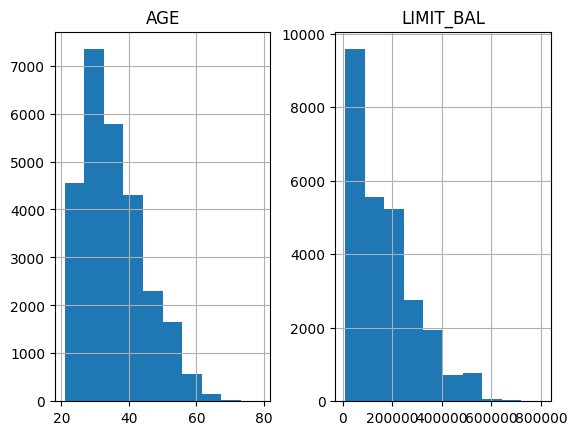

In [85]:
df_clean_2[['AGE','LIMIT_BAL']].hist();

In [86]:
# Estatística descritiva
df_clean_2[['AGE','LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


In [87]:
# Contagem de valores categórios da feature education
df_clean_2['EDUCATION'].value_counts()

# Veja que 0, 5 e 6 não estão documentados no dicionário de dados
# Vamos transformá-los na categoria "Outros"

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [88]:
# Transformando [0, 5, 6] em 4 (outros)
df_clean_2['EDUCATION'].replace( # Seleciono a coluna e chamo a função replace
  to_replace=[0, 5, 6], # to_replace mostra o valor a ser buscado no df para que seja substituído
  value=4, # indica o novo valor
  inplace=True # informa que a alteração é feita no df_clean_2
  )

df_clean_2['EDUCATION'].value_counts() # Veja a saída modificada

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [89]:
# O zero não está no dicionário de dados.
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [90]:
# Substituindo por 3 = "Outros"
df_clean_2['MARRIAGE'].replace(to_replace=0,value=3,inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

In [91]:
df_clean_2[['ID', 'default payment next month']].head(20)

,ID,default payment next month
0,798fc410-45c1,1
1,8a8c8f3b-8eb4,1
2,85698822-43f5,0
3,0737c11b-be42,0
4,3b7f77cc-dbc0,0
5,ceae2946-47e4,0
6,d3b8ce26-9c89,0
7,d6e1911b-54d0,0
8,8421d3b3-2b54,0
9,62a2fd79-cd90,0


In [92]:
# Feature categóricas (ordinais e não ordinais)
# Em machine learning prefira dados numéricos, logo transforme dados textuais em um dicionário de dados

# Este comando agrupa a coluna Education em [1, 2, 3, 4], de acordo com dicionário de dadoa.
# Depois calcula uma média de valores de cada grupo e gera um gráfico de barras

df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'})


,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


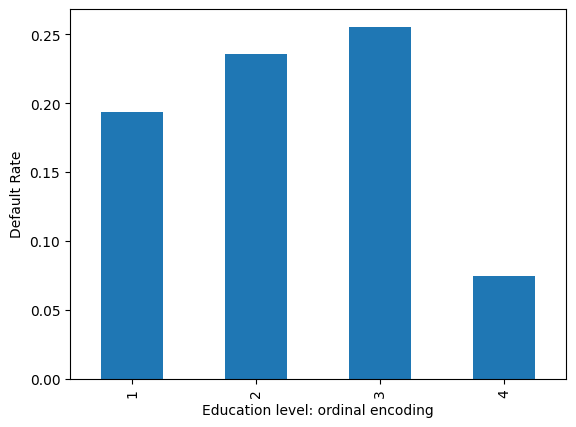

In [93]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default Rate')
plt.xlabel('Education level: ordinal encoding');

### 7. Implementando a OHE para uma característica categórica

In [94]:
# OHE - One Hot Encoding
# Usado para transformar variáveis categóricas em números por meio de um dicionário de dados

df_clean_2[['EDUCATION_CAT']] = 'none'
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [95]:
df_clean_2['EDUCATION_CAT'].value_counts()


EDUCATION_CAT
none    26664
Name: count, dtype: int64

In [96]:
# Dicionário de dados

cat_mapping = {
  1: 'graduate school',
  2: 'university',
  3: 'high school',
  4: 'others'
}
cat_mapping

{1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'}

In [97]:
# Criando o mapeamento das categorias de graduação escolar
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

# Exibindo
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [98]:
# Criando dummies da coluna EDUCATION_CAT 
# Esse código expande cada valor da coluna EDUCATION_CAT em 4 colunas, nas quais
# 1 significa na coluna 'graduate school', que a linha atual possui valor 'graduate school', por exemplo,
# e as demais colunas ['university', 'high school', 'others'], terão valor zero

edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

# Isso é feito para que cada valor do dicionário de dados seja colocado a mostra sendo 
# concatenado com o df_clean_2. Assim, cada será uma nova coluna com true para a linha
# sujo ID (conta bancária), possui graduação de acordo com a coluna onde estiver marcado o true.

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


In [101]:
# Concatenando df_clean_2 e edu_ohe

df_with_ohe = pd.concat([df_clean_2,edu_ohe], axis=1)
df_with_ohe[['ID','LIMIT_BAL', 'EDUCATION_CAT', 'graduate school', 'university', 'high school', 'others']].head(10)

,ID,LIMIT_BAL,EDUCATION_CAT,graduate school,university,high school,others
0,798fc410-45c1,20000,university,False,True,False,False
1,8a8c8f3b-8eb4,120000,university,False,True,False,False
2,85698822-43f5,90000,university,False,True,False,False
3,0737c11b-be42,50000,university,False,True,False,False
4,3b7f77cc-dbc0,50000,university,False,True,False,False
5,ceae2946-47e4,50000,graduate school,True,False,False,False
6,d3b8ce26-9c89,500000,graduate school,True,False,False,False
7,d6e1911b-54d0,100000,university,False,True,False,False
8,8421d3b3-2b54,140000,high school,False,False,True,False
9,62a2fd79-cd90,20000,high school,False,False,True,False


In [103]:
# Salvando o df em um arquivo CSV
df_with_ohe.to_csv('chapter_1_cleaned_data.csv',index=False)